In [7]:
import pandas as pd

df = pd.read_csv('/content/Breast_cancer_dataset.csv')

display(df.head())
display(df.info())

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

None

In [8]:
from sklearn.preprocessing import StandardScaler

# Drop the 'Unnamed: 32' column
df = df.drop('Unnamed: 32', axis=1)

# Convert the 'diagnosis' column to numerical representation
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})

# Separate features (X) and target (y)
X = df.drop(['diagnosis', 'id'], axis=1)
y = df['diagnosis']

# Scale the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled features back to a DataFrame (optional, but good for inspection)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

display(X_scaled_df.head())
display(y.head())

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


,diagnosis
0,1
1,1
2,1
3,1
4,1


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

# Instantiate the models
log_reg_model = LogisticRegression()
svm_model = SVC()
rf_model = RandomForestClassifier()

# Train the models
log_reg_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions
log_reg_pred = log_reg_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

In [11]:
# Calculate metrics for Logistic Regression
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
log_reg_precision = precision_score(y_test, log_reg_pred)
log_reg_recall = recall_score(y_test, log_reg_pred)
log_reg_f1 = f1_score(y_test, log_reg_pred)

# Calculate metrics for SVM
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred)

# Calculate metrics for Random Forest
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

# Print the metrics
print("Logistic Regression Metrics:")
print(f"  Accuracy: {log_reg_accuracy:.4f}")
print(f"  Precision: {log_reg_precision:.4f}")
print(f"  Recall: {log_reg_recall:.4f}")
print(f"  F1-score: {log_reg_f1:.4f}")
print("\nSVM Metrics:")
print(f"  Accuracy: {svm_accuracy:.4f}")
print(f"  Precision: {svm_precision:.4f}")
print(f"  Recall: {svm_recall:.4f}")
print(f"  F1-score: {svm_f1:.4f}")
print("\nRandom Forest Metrics:")
print(f"  Accuracy: {rf_accuracy:.4f}")
print(f"  Precision: {rf_precision:.4f}")
print(f"  Recall: {rf_recall:.4f}")
print(f"  F1-score: {rf_f1:.4f}")

Logistic Regression Metrics:
  Accuracy: 0.9737
  Precision: 0.9762
  Recall: 0.9535
  F1-score: 0.9647

SVM Metrics:
  Accuracy: 0.9737
  Precision: 0.9762
  Recall: 0.9535
  F1-score: 0.9647

Random Forest Metrics:
  Accuracy: 0.9649
  Precision: 0.9756
  Recall: 0.9302
  F1-score: 0.9524


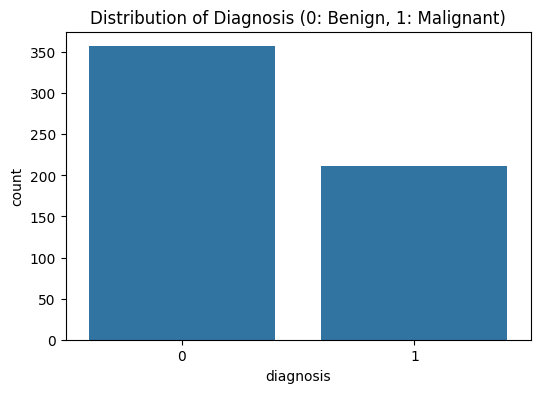

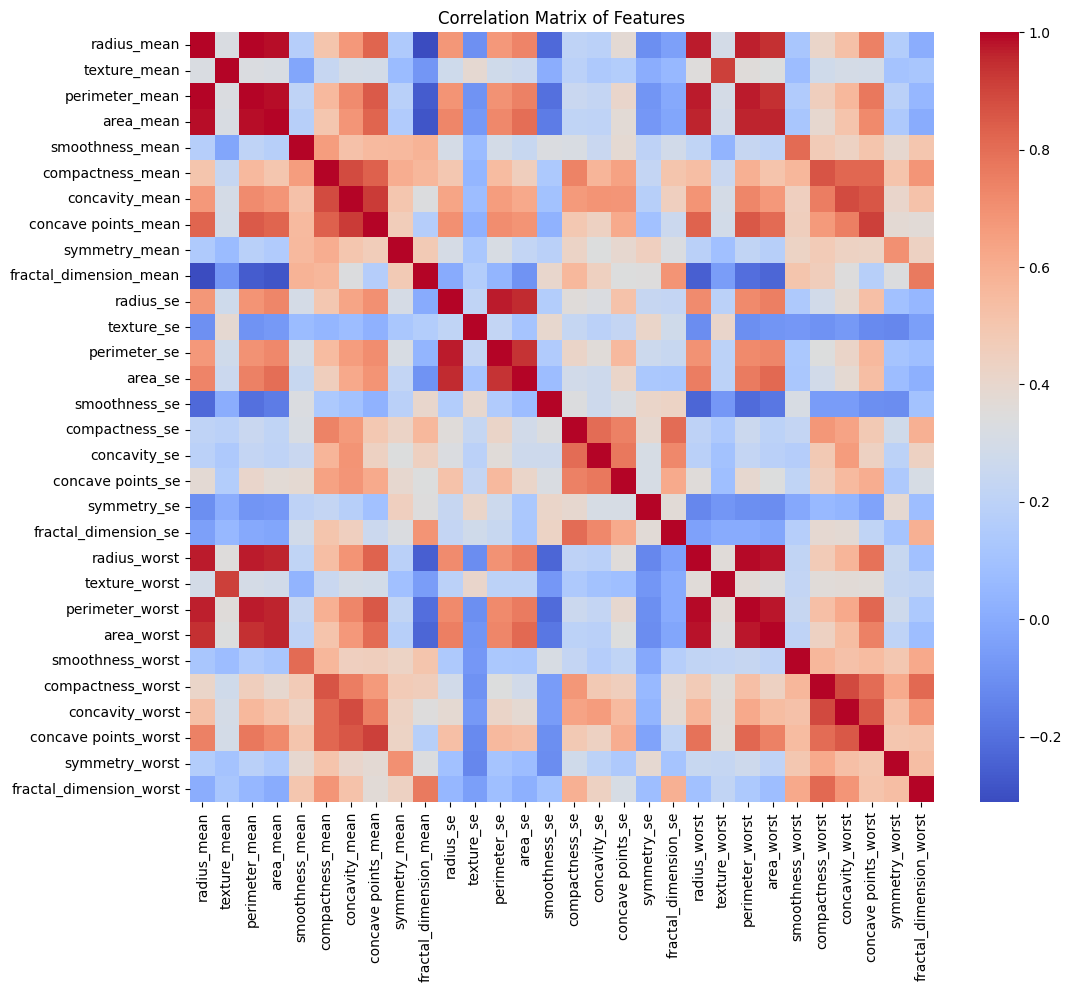

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of the diagnosis
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=df)
plt.title('Distribution of Diagnosis (0: Benign, 1: Malignant)')
plt.show()

# Plot the correlation matrix of the features
plt.figure(figsize=(12, 10))
sns.heatmap(X_scaled_df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Matrix of Features')
plt.show()

## Summary:

### Data Analysis Key Findings

* The dataset contains 569 entries and 33 columns, with one column ("Unnamed: 32") containing only null values.
* The `diagnosis` column was successfully transformed from categorical labels ('B' and 'M') to numerical representations (0 and 1).
* The numerical features were scaled using `StandardScaler`.
* The data was split into training and testing sets with a test size of 20%.
* Logistic Regression, Support Vector Machine (SVM), and Random Forest models were trained on the training data.
* Both Logistic Regression and SVM models achieved an accuracy of 0.9737, a precision of 0.9762, a recall of 0.9535, and an F1-score of 0.9647 on the test set.
* The Random Forest model achieved an accuracy of 0.9649, a precision of 0.9756, a recall of 0.9302, and an F1-score of 0.9524 on the test set.


